In [9]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [10]:
train_data = np.array(pd.read_csv('linear_data_train.csv'))
test_data = np.array(pd.read_csv('linear_data_test.csv'))

X_train = train_data[:, 0:2]
Y_train = train_data[:, 2]
X_test = test_data[:, 0:2]
Y_test = test_data[:, 2]


In [14]:
def fit(X_train,Y_train):
    lr = 0.01
    epochs = 8
    N = X_train.shape[0]

    m = np.random.rand(2, 1)
    b = np.random.rand(1, 1)

    x_0_range=np.arange(X_train[:,0].min(),X_train[:,0].max(),0.1)
    x_1_range=np.arange(X_train[:,1].min(),X_train[:,1].max(),0.1)

    Error = []
    for i in range(epochs):
        errors = []

        for n in range(N):

            y_pred = np.matmul(X_train[n:n+1],m)+b
            e= np.subtract(Y_train[n], y_pred)

            Y_pred = np.matmul(X_train, m) + b
            error = np.mean(np.abs(Y_train - Y_pred))
            errors.append(np.abs(e[0,0]))

            #update
            m = m + lr*X_train[n:n+1,:].T* e
            b = b + lr * e

            # plot data
            ax = plt.subplot(1, 2, 1, projection='3d')

            # ax.clear()
            x_0, x_1 = np.meshgrid(x_0_range, x_1_range)
            z = x_0 * m[0] + x_1 * m[1] + b
            ax.plot_surface(x_0, x_1, z, rstride=1, cstride=1, alpha=0.4)
            ax.scatter(X_train[Y_train == 1, 0], X_train[Y_train == 1, 1], Y_train[Y_train == 1], c='r', marker='o')
            ax.scatter(X_train[Y_train == -1, 0], X_train[Y_train == -1, 1], Y_train[Y_train == -1], c='g', marker='o')
            ax.set_xlabel('X0')
            ax.set_ylabel('X1')
            ax.set_zlabel('Y')

        # Plot Error
        Error.append(np.mean(errors))
        ax2 = plt.subplot(1, 2, 2)
        ax2.set_title('Loss')
        x = np.arange(0, len(Error))
        ax2.plot(x, Error, marker='o')
        plt.pause(0.01)
        # ax2.show()
    return m,b

def predict(X_test):
    y_pred=np.matmul(X_test,m)+b
    return y_pred

def evaluate(X,Y):
    y_pred = np.matmul(X, m) + b
    y_predic = np.zeros(len(y_pred))
    for i ,test in enumerate(X):
        y_predic[i]=predict(test)
    y_predic[np.where(y_predic<0)] =  -1
    y_predic[np.where(y_predic>0)] = 1
    accuracy = (y_predic == Y).sum() / len(Y)
    loss = np.mean(np.abs(np.subtract(Y, y_pred)))
    return loss, accuracy


<IPython.core.display.Javascript object>


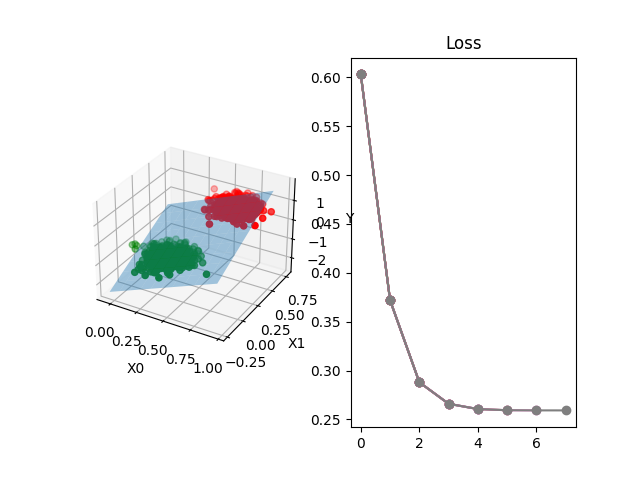

/home/deep/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/deep/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/deep/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes 

In [12]:
m,b = fit(X_train,Y_train)


In [15]:
y_pred=predict(X_test)
loss, accuracy = evaluate(X_test, Y_test)
print('error',loss, 'accuracy',accuracy)

error 1.0761142861402402 accuracy 1.0


In [17]:
loss, accuracy = evaluate(X_train, Y_train)
print('error',loss, 'accuracy',accuracy)


error 1.0765705988889636 accuracy 0.999
